# Basic Information

In [113]:
#modules
import pandas as pd
import numpy as np
import datetime as dt

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#encoding 
import category_encoders as ce

#transforming
from scipy.stats import boxcox, skew
from scipy.special import inv_boxcox

#regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Info

In [115]:
df = pd.read_csv(r'D:\Vscode\Module 1\Data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Numerical Discrete**
- bedrooms
- bathrooms
- floors
- yr_built
- yr_renovated

**Numerical Continuous**
- price 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15

**Categorical Nominal**
- waterfront
- zipcode

**Categorical Ordinal**
- grade
- view
- condition

**Spatial Features** - don't include in the model (exclude spatial features even if they have high corr)
- Latitude and Longitude 

In [117]:
df.describe()
#year renovated has 0 values, which could mean never been renovated -> age of house, years since renovated

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Some notes:
- there are 0 bedroom houses and 0 bathroom houses
- house with 33 bedrooms
- sqft_lot and sqft_living have large and small values

In [118]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [119]:
#checking for 0 values
(df == 0).sum()

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [120]:
#dropping any duplicates
df = df.drop_duplicates()

#dropping unnecessary columns
df.drop(columns=['lat','long','id','date'], axis = 1, inplace = True)

# Feature Engineering

In [123]:
df['age'] = current_year - df['yr_built']
df['yrs_since_ren'] = np.where(df.yr_renovated == 0, df.age, current_year-df.yr_renovated)
df = df.drop(['yr_built','yr_renovated'], axis = 1)

In [124]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,yrs_since_ren
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,69,69
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,73,33
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,91,91
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,59,59
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,37,37


# Data Cleaning

In [ ]:
#changing datetime to DT object
current_year = dt.date.today().year

## Bedrooms

In [125]:
df.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [126]:
df[df['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,yrs_since_ren
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,98103,1330,4700,77,77


In [127]:
#This is an outlier. Dropping row where bedrooms = 33
df = df.drop(15870)

In [128]:
#checking to make sure it's dropped
df[df['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,yrs_since_ren


## Bathrooms

In [129]:
df[df['bathrooms']==0].count()

price            10
bedrooms         10
bathrooms        10
sqft_living      10
sqft_lot         10
floors           10
waterfront       10
view             10
condition        10
grade            10
sqft_above       10
sqft_basement    10
zipcode          10
sqft_living15    10
sqft_lot15       10
age              10
yrs_since_ren    10
dtype: int64

## Sqft_living

In [130]:
df[df['sqft_living'] > 8000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,yrs_since_ren
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,98033,3430,26788,25,25
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,98004,3930,25449,84,23
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,98039,3560,24345,23,23
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,98102,3940,8800,114,37
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,98040,3270,10454,41,15
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,98039,4540,42730,23,23
12777,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,98053,4850,217800,25,25
14556,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,98177,4140,81021,59,21
18302,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,98006,4160,18969,23,23


- id: 1225069038

## One Hot Encode Zipcode

# Data Exploration (EDA)

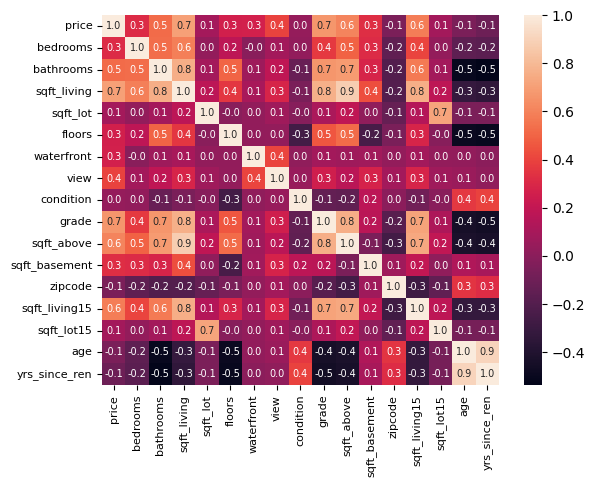

<Figure size 1200x1000 with 0 Axes>

In [134]:
corr_columns = df
heatmap = sns.heatmap(corr_columns.corr(numeric_only=True), annot = True, fmt='.1f', annot_kws={'size': 7})
plt.figure(figsize=(12,10))
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8);

Highly Correlated 
- sqft_living, sqft_above
- sqft_living, grade
- sqft_above, grade
- age, yrs_since_ren

Observation:
- sqft_living and sqft_above multicollinearity

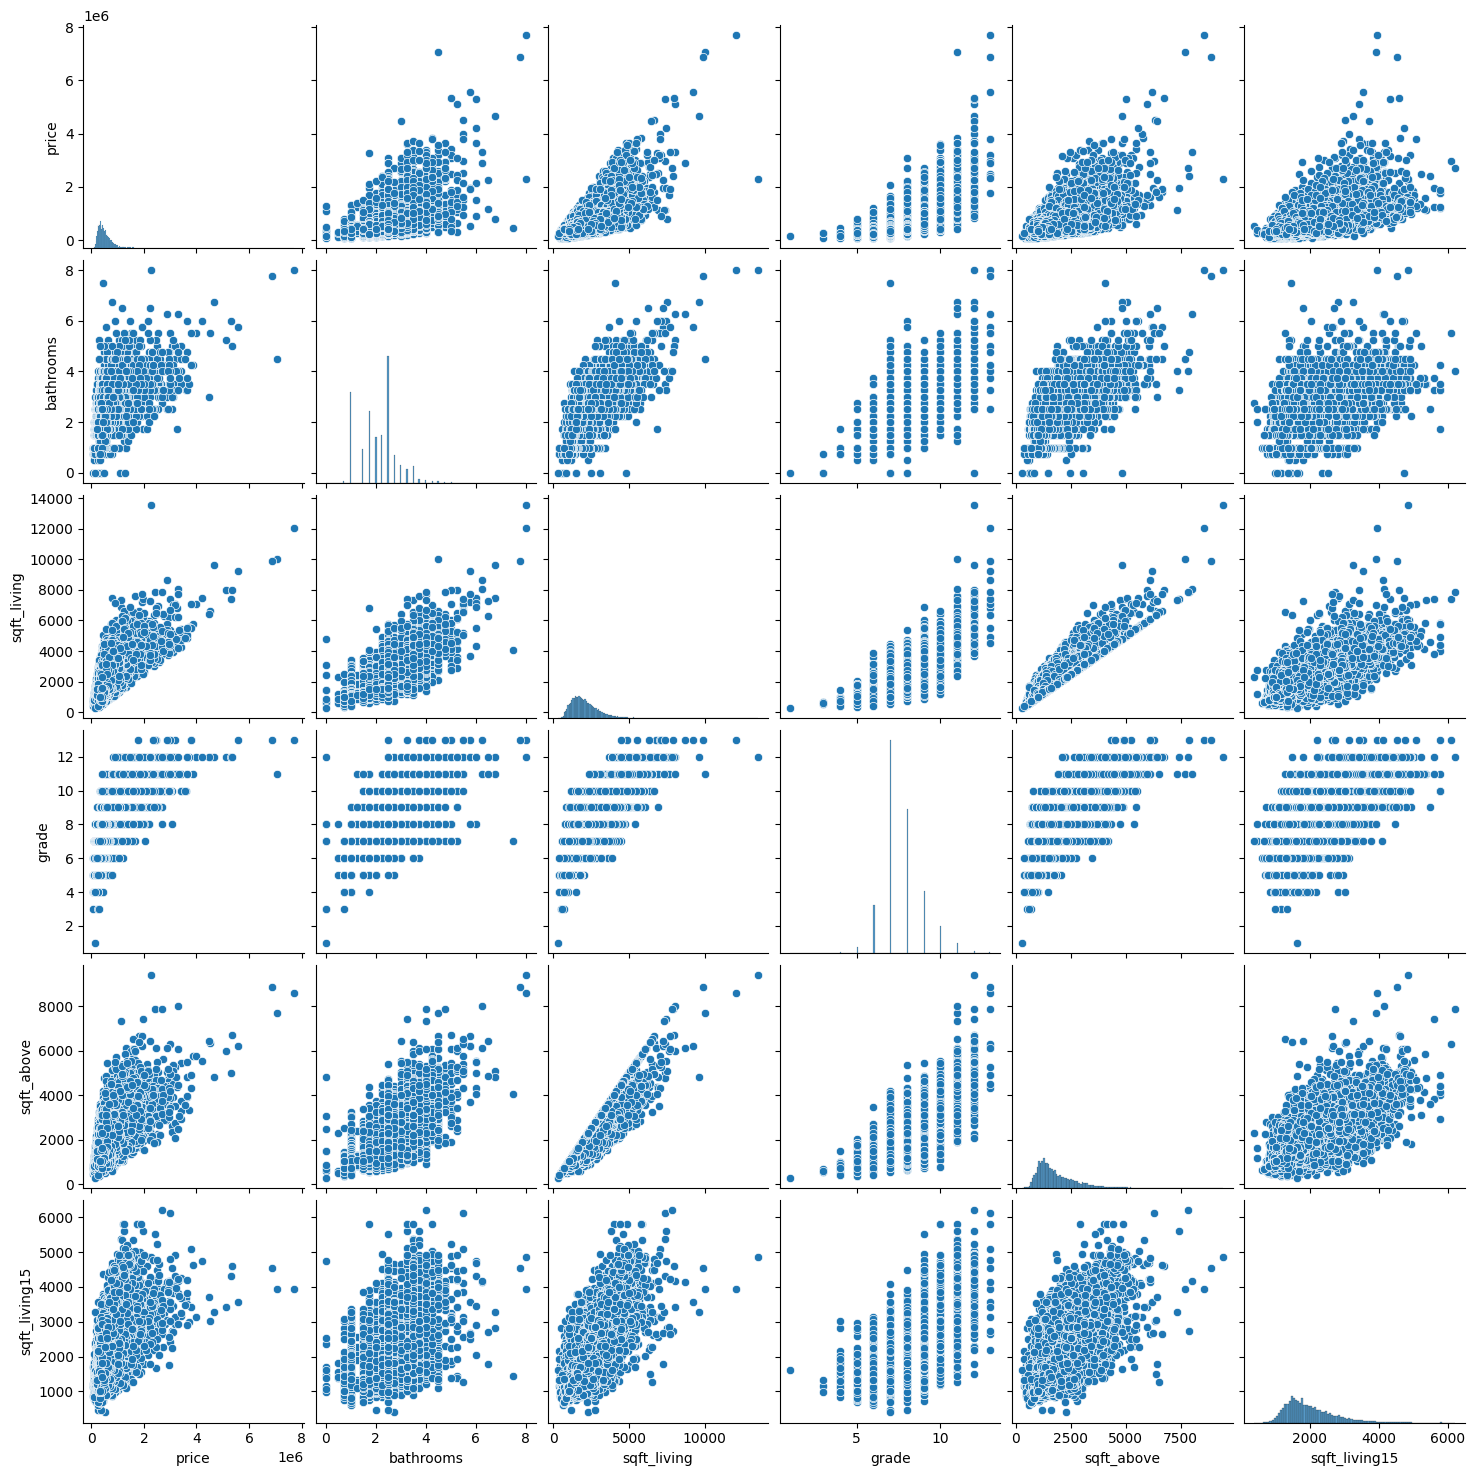

In [135]:
#scatterplot for selected columns
cols = ['price','bathrooms','sqft_living','grade','sqft_above','sqft_living15']
sns.pairplot(df[cols]);

- linear relationship between sqft_living and sqft_above
- price increases with bathrooms, sqft_living, sqft_above, and sqft_living 15

In [136]:
df.corr(numeric_only=True)['price'].abs().sort_values()

condition        0.036336
zipcode          0.053209
age              0.054023
sqft_lot15       0.082451
sqft_lot         0.089664
yrs_since_ren    0.105768
floors           0.256811
waterfront       0.266371
bedrooms         0.315445
sqft_basement    0.323812
view             0.397299
bathrooms        0.525147
sqft_living15    0.585404
sqft_above       0.605591
grade            0.667447
sqft_living      0.702047
price            1.000000
Name: price, dtype: float64

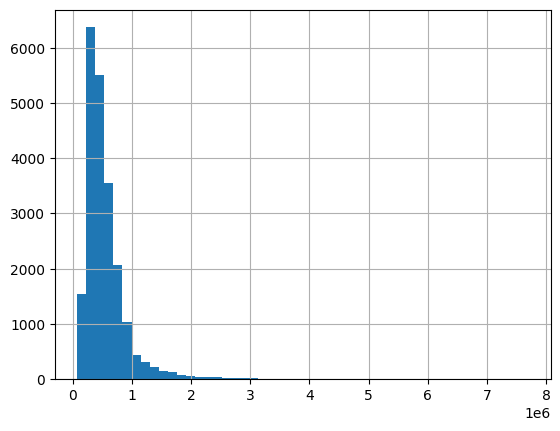

In [137]:
# looking at price (target)
df['price'].hist(bins=50);
#right skewed

# Transformation

In [138]:
# use log transformation on all numerical values
numerical_columns = df.select_dtypes(exclude = 'object')
numerical_columns = numerical_columns.drop(columns='zipcode', axis = 1)
transformed_columns = np.log1p(numerical_columns)
df = df.drop(numerical_columns, axis = 1)
df = pd.concat([df,transformed_columns], axis = 1)
df

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,yrs_since_ren
0,98178,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.0,1.386294,2.079442,7.074117,0.000000,7.201171,8.639588,4.248495,4.248495
1,98125,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.0,1.386294,2.079442,7.682943,5.993961,7.433075,8.941153,4.304065,3.526361
2,98028,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.0,1.386294,1.945910,6.647688,0.000000,7.908755,8.995041,4.521789,4.521789
3,98136,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.0,1.791759,2.079442,6.957497,6.814543,7.215975,8.517393,4.094345,4.094345
4,98074,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.0,1.386294,2.197225,7.427144,0.000000,7.496097,8.923191,3.637586,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,98103,12.793862,1.386294,1.252763,7.333676,7.031741,1.386294,0.0,0.0,1.386294,2.197225,7.333676,0.000000,7.333676,7.319865,2.772589,2.772589
21609,98146,12.899222,1.609438,1.252763,7.745436,8.668024,1.098612,0.0,0.0,1.386294,2.197225,7.745436,0.000000,7.512618,8.881975,2.397895,2.397895
21610,98144,12.904461,1.098612,0.559616,6.928538,7.208600,1.098612,0.0,0.0,1.386294,2.079442,6.928538,0.000000,6.928538,7.604894,2.772589,2.772589
21611,98027,12.899222,1.386294,1.252763,7.378384,7.778630,1.098612,0.0,0.0,1.386294,2.197225,7.378384,0.000000,7.252054,7.160846,3.044522,3.044522


# Encoding

In [139]:
#change zipcode to an object 
df['zipcode'] = df['zipcode'].astype(str)
df

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,yrs_since_ren
0,98178,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.0,1.386294,2.079442,7.074117,0.000000,7.201171,8.639588,4.248495,4.248495
1,98125,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.0,1.386294,2.079442,7.682943,5.993961,7.433075,8.941153,4.304065,3.526361
2,98028,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.0,1.386294,1.945910,6.647688,0.000000,7.908755,8.995041,4.521789,4.521789
3,98136,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.0,1.791759,2.079442,6.957497,6.814543,7.215975,8.517393,4.094345,4.094345
4,98074,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.0,1.386294,2.197225,7.427144,0.000000,7.496097,8.923191,3.637586,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,98103,12.793862,1.386294,1.252763,7.333676,7.031741,1.386294,0.0,0.0,1.386294,2.197225,7.333676,0.000000,7.333676,7.319865,2.772589,2.772589
21609,98146,12.899222,1.609438,1.252763,7.745436,8.668024,1.098612,0.0,0.0,1.386294,2.197225,7.745436,0.000000,7.512618,8.881975,2.397895,2.397895
21610,98144,12.904461,1.098612,0.559616,6.928538,7.208600,1.098612,0.0,0.0,1.386294,2.079442,6.928538,0.000000,6.928538,7.604894,2.772589,2.772589
21611,98027,12.899222,1.386294,1.252763,7.378384,7.778630,1.098612,0.0,0.0,1.386294,2.197225,7.378384,0.000000,7.252054,7.160846,3.044522,3.044522


In [140]:
df['zipcode'].dtypes

dtype('O')

In [141]:
# categorical_columns = df.select_dtypes(include='object')
one = ce.OneHotEncoder(use_cat_names=True)
encoded_columns = df.select_dtypes(include = 'object')
one.fit(encoded_columns)
encoded = one.transform(encoded_columns)
df = pd.concat([df, one.transform(encoded_columns)], axis = 1)
df.drop(encoded_columns, axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98155,zipcode_98024,zipcode_98011,zipcode_98031,zipcode_98106,zipcode_98072,zipcode_98188,zipcode_98014,zipcode_98055,zipcode_98039
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.0,1.386294,2.079442,...,0,0,0,0,0,0,0,0,0,0
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.0,1.386294,2.079442,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.0,1.386294,1.945910,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.0,1.791759,2.079442,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.0,1.386294,2.197225,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793862,1.386294,1.252763,7.333676,7.031741,1.386294,0.0,0.0,1.386294,2.197225,...,0,0,0,0,0,0,0,0,0,0
21609,12.899222,1.609438,1.252763,7.745436,8.668024,1.098612,0.0,0.0,1.386294,2.197225,...,0,0,0,0,0,0,0,0,0,0
21610,12.904461,1.098612,0.559616,6.928538,7.208600,1.098612,0.0,0.0,1.386294,2.079442,...,0,0,0,0,0,0,0,0,0,0
21611,12.899222,1.386294,1.252763,7.378384,7.778630,1.098612,0.0,0.0,1.386294,2.197225,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [142]:
X = df.drop(['price'], axis = 1)
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.25, shuffle=True)

# Linear Regression

In [171]:
lr =LinearRegression()
model=lr.fit(X_train,y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

y_train_pred_real = np.expm1(y_train_predict)
y_test_pred_real = np.expm1(y_test_predict)
y_train_real = np.expm1(y_train)
y_test_real = np.expm1(y_test)


#Training: Calculate R2 and RMSE
ar2_train = 1 - ( 1-model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared training: ', ar2_train)

rmse_train = (mean_squared_error(y_train, y_train_predict))**0.5
print('RMSE training: ', rmse_train)

# Testing: Calculate R2 and RMSE
#r2_test = r2_score(y_test, y_test_pred)
ar2_train = 1 - ( 1-model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared test: ', ar2_train)

rmse_test = (mean_squared_error(y_test, y_test_predict))**0.5
print('RMSE test: ', rmse_test)

Adjusted R squared training:  0.8824601301902375
RMSE training:  0.18019654023325204
Adjusted R squared test:  0.8824601301902375
RMSE test:  0.18275976162960966


# Multiple Linear Regression

In [ ]:
lr_mult = LinearRegression()
model_mult = lr_mult.fit(X_train,y_train)
y_train_pred = model_mult.predict(X_train)
y_test_pred = model_mult.predict(X_test)

#Training: Calculate R2 and RMSE
ar2_train = 1 - ( 1-model_mult.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared training: ', ar2_train)

rmse_train = (mean_squared_error(y_train, y_train_pred))**0.5
print('RMSE training: ', rmse_train)

# Testing: Calculate R2 and RMSE
#r2_test = r2_score(y_test, y_test_pred)
ar2_train = 1 - ( 1-model_mult.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared training: ', ar2_train)

rmse_test = (mean_squared_error(y_test, y_test_pred))**0.5
print('RMSE test: ', rmse_test)

# Lasso Regression

In [163]:
l = Lasso(alpha = 0.0005)
lasso_model = l.fit(X_train,y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [164]:
lasso_model.coef_

array([-0.05280812,  0.05113884,  0.18664936,  0.05568725, -0.        ,
        0.60421822,  0.13488274,  0.24466774,  0.84256307,  0.25726437,
        0.01042436,  0.17867886, -0.02504308,  0.07468993, -0.05860116,
       -0.24972405,  0.08519647, -0.02426373,  0.1843764 ,  0.0579256 ,
        0.10891212, -0.42467574, -0.3564977 , -0.12232789, -0.28522698,
        0.10204708,  0.34130817,  0.36445501,  0.08989627, -0.09603547,
        0.34902467, -0.40411719,  0.        ,  0.357043  , -0.4250485 ,
       -0.38285279,  0.44361237,  0.52843761,  0.13177097,  0.00472001,
        0.33595932, -0.28711249, -0.44794254, -0.11407373, -0.13082247,
       -0.48419726, -0.04310493, -0.08117035,  0.42735341, -0.38954131,
        0.13365541, -0.11269589,  0.29840059,  0.19047175,  0.62494932,
        0.17327828,  0.05517087,  0.06253844,  0.27269979, -0.12494517,
        0.00579623,  0.34742556, -0.39922221, -0.08588103,  0.39824413,
       -0.        , -0.0435234 , -0.32232397,  0.06459113, -0.03

In [165]:
# Training: Calculate R2 and RMSE
ar2_train = 1 - ( 1-lasso_model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared training: ', ar2_train)
rmse_train = (mean_squared_error(y_train_real, y_train_pred_real))**0.5
print('RMSE training: ', rmse_train)

# Testing: Calculate R2 and RMSE
ar2_test = 1 - ( 1-lasso_model.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print('Adjusted R squared test: ', ar2_test)
rmse_test = (mean_squared_error(y_test_real, y_test_pred_real))**0.5
print('RMSE test: ', rmse_test)

Adjusted R squared training:  0.8740255942730832
RMSE training:  141904.17718465446
Adjusted R squared test:  0.8702764512381281
RMSE test:  141330.81557515002
